* Autor: Miguel Thomas
* Docente: Ricardo Fonseca

# Analisis de Componentes Principales (PCA):

## Set de datos


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dt = {"ingreso": [9136.81, 11793.94, 12416.79, 6446.6, 64685.8, 31358.6, 94665.6, 64866.3, 58857.9, 42555.6,
                  6513.3, 45123.6, 79523.2, 15635.2, 21345.6, 12315.6, 56541.5, 46854.5, 1234.6, 23654.1],
        "horas_trabajadas":[20.6, 25.7, 28.8, 5.9, 60.4, 45.9, 20.6, 56.3, 12.5, 23.4, 45.2, 63.1, 84.0, 12.6, 56.4, 23.3, 32.32, 65.56, 96.6, 20.0]
}
df = pd.DataFrame(dt)
df

,ingreso,horas_trabajadas
0,9136.81,20.60
1,11793.94,25.70
2,12416.79,28.80
3,6446.60,5.90
4,64685.80,60.40
5,31358.60,45.90
6,94665.60,20.60
7,64866.30,56.30
8,58857.90,12.50
9,42555.60,23.40


## Visualización de datos

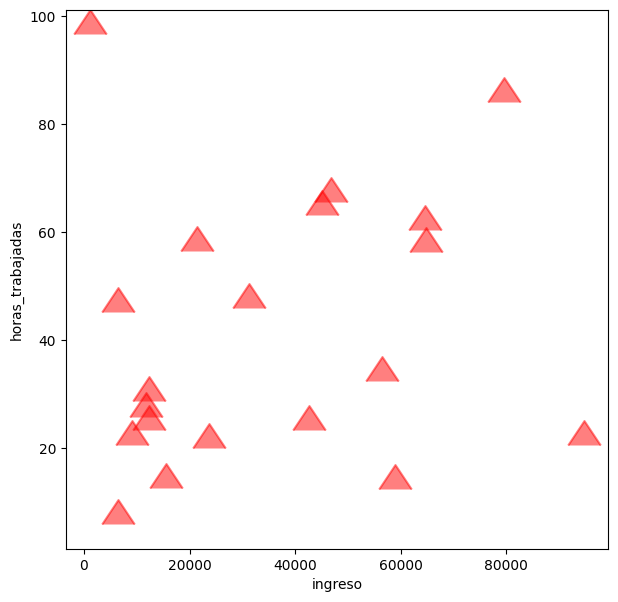

In [ ]:
fig = plt.figure(figsize = (7,7))

plt.scatter(df['ingreso'],df['horas_trabajadas'], marker=10,s=550, color = 'red', alpha = 0.5)
plt.xlabel('ingreso')
plt.ylabel('horas_trabajadas')
plt.show()

## Reducción de dimensionalidad

### Paso 1: Estandarización de los datos

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
df_standar = pd.DataFrame(StandardScaler().fit_transform(df),columns =['ingreso','horas_trabajadas'])

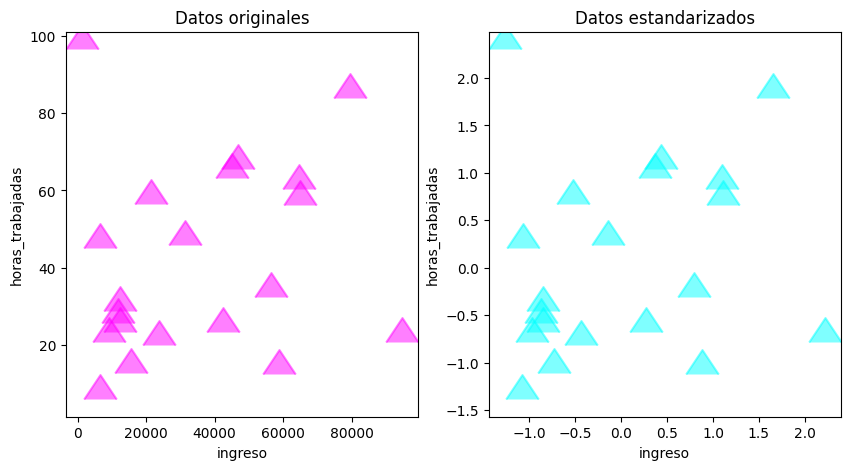

In [ ]:
fig = plt.figure(figsize= (10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.set_title('Datos originales')
ax1.scatter(df['ingreso'],df['horas_trabajadas'], marker=10,s=550, color = 'magenta', alpha = 0.5)
ax1.set_xlabel('ingreso')
ax1.set_ylabel('horas_trabajadas')

ax2.set_title('Datos estandarizados')
ax2.scatter(df_standar['ingreso'],df_standar['horas_trabajadas'], marker=10,s=550, color = 'cyan', alpha = 0.5)
ax2.set_xlabel('ingreso')
ax2.set_ylabel('horas_trabajadas')

plt.show()

### Paso 2: Calcular matriz de covarianza

In [ ]:
print(df_standar.cov())

                   ingreso  horas_trabajadas
ingreso           1.052632          0.189760
horas_trabajadas  0.189760          1.052632


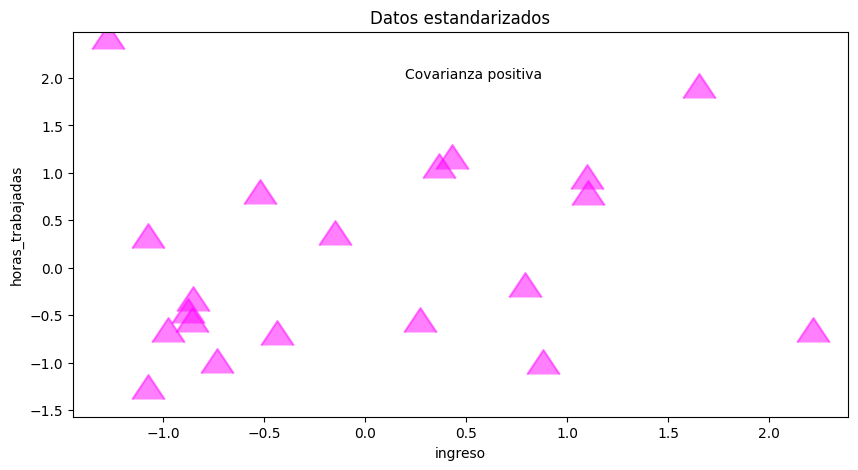

In [ ]:
fig = plt.figure(figsize= (10,5))
plt.title('Datos estandarizados')
plt.scatter(df_standar['ingreso'],df_standar['horas_trabajadas'], marker=10,s=550, color = 'magenta', alpha = 0.5)
plt.xlabel('ingreso')
plt.ylabel('horas_trabajadas')
plt.text(0.2,2,'Covarianza positiva', color = 'black')


plt.show()

## Paso 3: Calcular valores y vectores Eige

In [ ]:
# Importamos libreria de numpy para hacer uso de algebra lineal
from numpy.linalg import eig

valsEIG, vecsEIG = eig(df_standar.cov())

print(f'Valores EIG (Magnitud):  {valsEIG}')
print(f'Vectores EIG (Sentido): {vecsEIG}')

Valores EIG (Magnitud):  [1.24239128 0.86287188]
Vectores EIG (Sentido): [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [ ]:
vec_1 = vecsEIG[:,0] #valores de la matriz - primer vector - posición 0
vec_2 = vecsEIG[:,1] #valores de la matriz - primer vector - posicion 1

print(f'Vector posicion 1: {vec_1}')
print(f'Vector posicion 2: {vec_2}')



Vector posicion 1: [0.70710678 0.70710678]
Vector posicion 2: [-0.70710678  0.70710678]


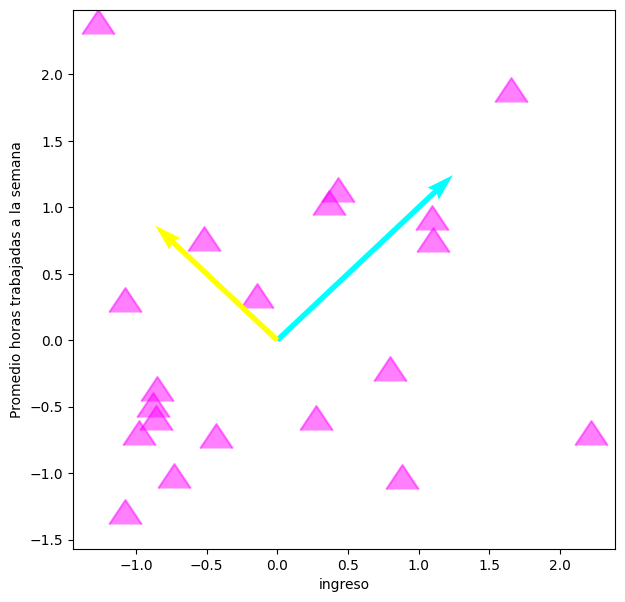

In [ ]:
plt.figure(figsize = (7,7))

plt.scatter(df_standar['ingreso'],df_standar['horas_trabajadas'], marker=10,s=550, color = 'magenta', alpha = 0.5)
plt.xlabel('ingreso')
plt.ylabel('Promedio horas trabajadas a la semana')
plt.quiver(0,0,vec_1[0]/abs(vec_1[0])*valsEIG[0],vec_1[1]/abs(vec_1[1])*valsEIG[0],color = 'cyan', angles="xy",scale_units="xy",scale= 1, width=0.01)
plt.quiver(0,0,vec_2[0]/abs(vec_2[0])*valsEIG[1],vec_2[1]/abs(vec_2[1])*valsEIG[1],color = 'yellow', angles="xy",scale_units="xy",scale= 1, width=0.01)
plt.show()

## Paso 4: Proyectar los datos

In [ ]:
proyec_df = pd.DataFrame(df_standar.values @ vecsEIG.T, columns = ['ingreso','horas_trabajadas'])

proyec_df

,ingreso,horas_trabajadas
0,-0.133625,-1.246458
1,-0.210065,-1.029730
2,-0.282723,-0.924187
3,0.217866,-1.739984
4,0.188851,1.363883
5,-0.274177,0.067336
6,2.124205,1.011371
7,0.311459,1.250805
8,1.411747,-0.166708
9,0.668103,-0.283776


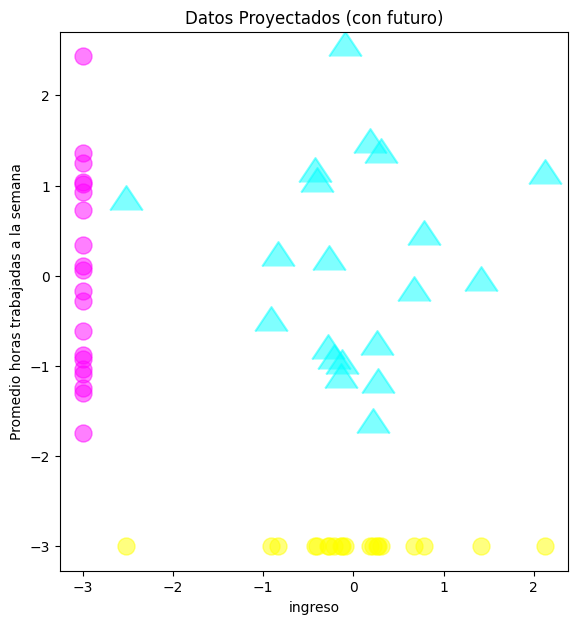

In [ ]:
plt.figure(figsize = (7,7))
plt.axes().set_aspect("equal")
plt.title('Datos Proyectados (con futuro)')
plt.scatter(proyec_df['ingreso'],proyec_df['horas_trabajadas'], marker=10,s=550, color = 'cyan', alpha = 0.5)
plt.xlabel('ingreso')
plt.ylabel('Promedio horas trabajadas a la semana')

# Proyección de datos en 1D
plt.scatter(proyec_df['ingreso'],[-3] * len(proyec_df['ingreso']),s=150, color = 'yellow', alpha = 0.5)
plt.xlabel('ingreso')
plt.ylabel('Promedio horas trabajadas a la semana')

# Proyección de datos en 1D
plt.scatter([-3] * len(proyec_df['horas_trabajadas']),proyec_df['horas_trabajadas'],s=150, color = 'magenta', alpha = 0.5)
plt.xlabel('ingreso')
plt.ylabel('Promedio horas trabajadas a la semana')

plt.show()

## BONUS - Con libreria

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA()
dt_pca = pca.fit_transform(df_standar)


(0.8, 3.2)

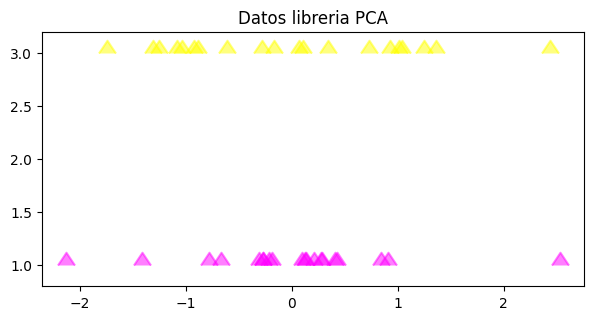

In [ ]:
plt.figure(figsize = (7,7))
plt.axes().set_aspect("equal")
plt.title('Datos libreria PCA')
plt.scatter(dt_pca[:,0],[3] * dt_pca[:,0].size, marker=10,s=150, color = 'yellow', alpha = 0.5)
plt.scatter(dt_pca[:,1],[1] * dt_pca[:,1].size, marker=10,s=150, color = 'magenta', alpha = 0.5)
plt.ylim((0.8,3.2))

In [ ]:
print(f'Eigen values {pca.explained_variance_}')

Eigen values [1.24239128 0.86287188]


In [ ]:
print(f'{pca.explained_variance_ratio_}')

[0.59013586 0.40986414]
